- listing_id: Unique identifier for each listing.
- name: The title or name of the listing.
- host_id: Unique identifier for each host.
- host_since: The date the host joined the platform.
- host_location: The location of the host.
- host_response_time: The average time it takes for the host to respond to inquiries.
- host_response_rate: The percentage of inquiries that the host responds to.
- host_acceptance_rate: The percentage of booking requests that the host accepts.
- host_is_superhost: Indicates whether the host is a superhost or not.
- host_total_listings_count: The total number of listings the host has.
- host_has_profile_pic: Indicates whether the host has a profile picture.
- host_identity_verified: Indicates whether the host's identity has been verified.
- neighbourhood: The name of the neighborhood where the listing is located.
- district: The district where the listing is located.
- city: The city where the listing is located.
- latitude: The latitude coordinate of the listing.
- longitude: The longitude coordinate of the listing.
- property_type: The type of property (e.g., apartment, house).
- room_type: The type of room available for rent (e.g., entire home/apt, private room).
- accommodates: The number of guests the listing can accommodate.
- bedrooms: The number of bedrooms in the listing.
- amenities: A list of amenities offered in the listing.
- price: The price per night for the listing.
- minimum_nights: The minimum number of nights required for booking.
- maximum_nights: The maximum number of nights allowed for booking.
- review_scores_rating: The overall rating score given by guests.
- review_scores_accuracy: The rating score for accuracy given by guests.
- review_scores_cleanliness: The rating score for cleanliness given by guests.
- review_scores_checkin: The rating score for check-in process given by guests.
- review_scores_communication: The rating score for communication given by guests.
- review_scores_location: The rating score for location given by guests.
- review_scores_value: The rating score for value given by guests.
instant_bookable: Indicates whether instant booking is available for the listing.

In [1]:
print("Importing.....", end="", flush=True)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
print("[Done]")

Importing.....[Done]


In [3]:
try:
    df = pd.read_csv('Listings.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('Listings.csv', encoding='latin1')

In [62]:
df.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [10]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

listing_id                          0
name                              175
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            91405
review_score

In [12]:
df.name.nunique()

265860

In [21]:
column_drop = ['listing_id','host_id','district']

In [24]:
dff= df.drop(column_drop,axis=1)


In [25]:
dff

,name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,"Beautiful Flat in le Village Montmartre, Paris",2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,39 mÃÂ² Paris (Sacre CÃ âur),2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,"Lovely apartment with Terrace, 60m2",2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,Cosy studio (close to Eiffel tower),2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,Close to Eiffel Tower - Beautiful flat : 2 rooms,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,Cozy Studio in Montmartre,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,Nice and cosy mini-appartement in Paris,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,Charming apartment near Rue Saint Maur / Oberk...,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [37]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   name                         279537 non-null  object        
 1   host_since                   279547 non-null  datetime64[ns]
 2   host_location                278872 non-null  object        
 3   host_response_time           150930 non-null  object        
 4   host_response_rate           150930 non-null  float64       
 5   host_acceptance_rate         166625 non-null  float64       
 6   host_is_superhost            279547 non-null  object        
 7   host_total_listings_count    279547 non-null  float64       
 8   host_has_profile_pic         279547 non-null  object        
 9   host_identity_verified       279547 non-null  object        
 10  neighbourhood                279712 non-null  object        
 11  city                      

In [55]:
dff.host_acceptance_rate.nunique()

101

In [36]:
dff['host_since'] = pd.to_datetime(df['host_since'])


In [40]:
dff.sample(20)

,name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
160183,"Smart apartament ,flat near termini 65m",2019-09-03,IT,within an hour,1.00,1.00,f,12.0,t,t,...,1,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
6397,Cosy studio in Montmartre,2014-09-09,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,...,3,1125,80.0,10.0,8.0,10.0,10.0,10.0,10.0,f
92788,"Trendy Artist's Studio Apt in City Centre, CPT",2017-05-14,"Cape Town, Western Cape, South Africa",within an hour,0.95,0.94,f,323.0,t,t,...,1,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t
237515,Appartement Paris 5e pour Decembre,2017-10-11,"Valognes, Normandy, France",within a few hours,1.00,NaN,f,0.0,t,t,...,7,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
60501,"Luxury FiDi Studio w/ Gym, Roof deck + Speakea...",2016-12-16,"New York, New York, United States",within an hour,1.00,0.99,f,1337.0,t,t,...,30,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
157908,Cute and conducive,2019-03-08,TR,a few days or more,0.00,0.00,f,0.0,t,f,...,1,180,20.0,8.0,2.0,6.0,8.0,8.0,2.0,t
278530,* Charming and authentic Parisian appartement *,2012-10-20,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,f,...,2,30,97.0,10.0,10.0,10.0,10.0,9.0,8.0,t
122015,"Queen bedroom in bright, leafy apmt. 100m to B...",2012-08-16,"Sydney, New South Wales, Australia",NaN,NaN,NaN,f,2.0,t,t,...,2,1125,96.0,10.0,9.0,10.0,10.0,10.0,10.0,t
184564,"Amazing Location, Excellent Price.",2014-01-28,"Mexico City, Federal District, Mexico",within an hour,1.00,1.00,t,4.0,t,t,...,2,10,95.0,9.0,9.0,9.0,9.0,10.0,9.0,t
103494,Cosy Blouberg Flatlet close to beach,2020-11-17,ZA,within an hour,1.00,1.00,f,0.0,t,f,...,2,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t


In [58]:
response_time_rate=dff.groupby('host_response_time')['host_response_rate'].mean()

''

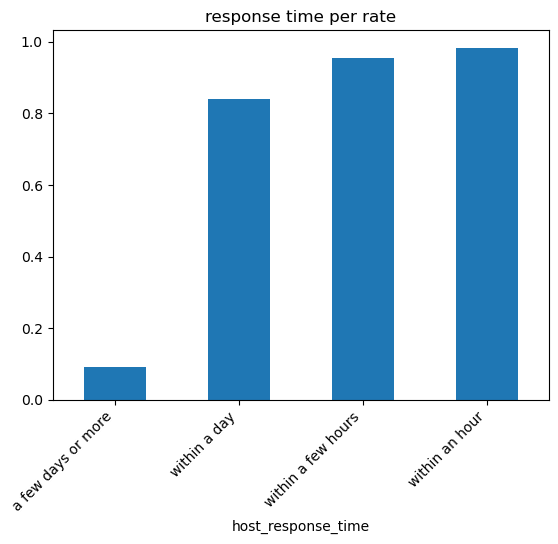

In [59]:
response_time_rate.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('response time per rate')
;

In [57]:
response_time_acceptance_rate=dff.groupby('host_response_time')['host_acceptance_rate'].mean()

Text(0.5, 1.0, 'response time per rate')

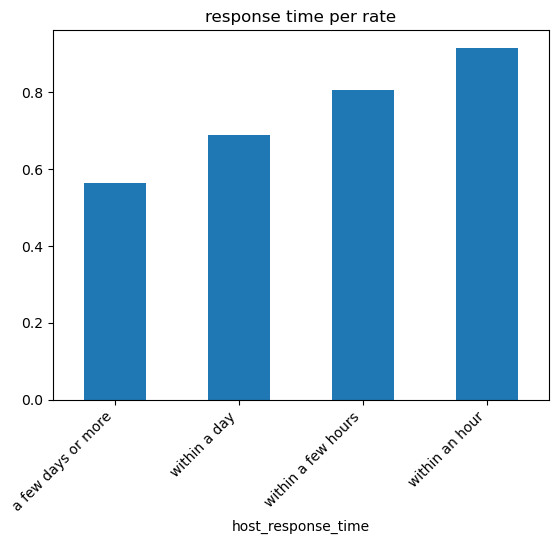

In [60]:
response_time_acceptance_rate.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('response time per acceptance rate')

In [71]:
df['host_since'] = pd.to_datetime(df['host_since'])

# Group by the year from 'host_since' column and calculate the mean price
mean_price_by_year = df.groupby(df['host_since'].dt.year)['price'].mean()

Text(0.5, 1.0, 'avg price by year')

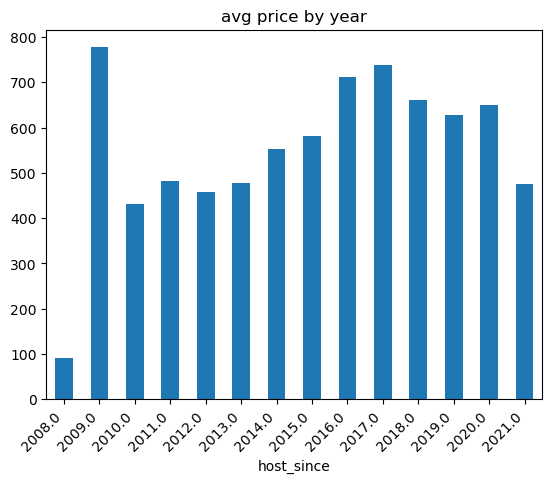

In [75]:
mean_price_by_year.plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title('av price by year')